In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

In [599]:
# user input: filename, range of melt period, location, date specifics

filename = 'vertprof_dec11_sdm.nc'

melt_start = '2011-12-19'
melt_end = '2011-12-24'         # one day past end of melt observed (non-inclusive)

meltloc = 'Siple Dome'
locID = 'sdm'                   # location shorthand 
meltday = 19
meltmonth = 'December'
meltyear = '2011'


In [600]:
# open dataset

ds_ERA5 = xr.open_dataset(filename)
ERA5 = ds_ERA5.to_dataframe()
ERA5 = ERA5.reset_index()

In [601]:
# limit dataframe to melt period 

ERA5 = ERA5[(ERA5['time'] > melt_start) & (ERA5['time'] < melt_end)]

In [602]:
# convert ciwc and clwc to g/kg 

ERA5['ciwc'] = ERA5['ciwc']*1000
ERA5['clwc'] = ERA5['clwc']*1000

In [603]:
ERA5.head()

,latitude,level,longitude,time,ciwc,clwc
433,-83.25,650,-160.343002,2011-12-19 01:00:00,0.0,0.0
434,-83.25,650,-160.343002,2011-12-19 02:00:00,0.0,0.0
435,-83.25,650,-160.343002,2011-12-19 03:00:00,0.0,0.0
436,-83.25,650,-160.343002,2011-12-19 04:00:00,0.0,0.0
437,-83.25,650,-160.343002,2011-12-19 05:00:00,0.0,0.0


In [604]:
# get spatial average of ciwc and clwc

ERA5_ciwc = ERA5.groupby(['level', 'time']).agg({'ciwc': ['mean']})
ERA5_clwc = ERA5.groupby(['level', 'time']).agg({'clwc': ['mean']})

ERA5_ciwc = ERA5_ciwc.reset_index()
ERA5_clwc = ERA5_clwc.reset_index()

ERA5_clwc.head()

,level,time,clwc
,,,mean
0,650,2011-12-19 01:00:00,0.000139
1,650,2011-12-19 02:00:00,0.000141
2,650,2011-12-19 03:00:00,0.000091
3,650,2011-12-19 04:00:00,0.000093
4,650,2011-12-19 05:00:00,0.000052


In [605]:
# rename columns

ERA5_ciwc.columns = ['level','time','mean']
ERA5_clwc.columns = ['level','time','mean']

ERA5_clwc.head()

,level,time,mean
0,650,2011-12-19 01:00:00,0.000139
1,650,2011-12-19 02:00:00,0.000141
2,650,2011-12-19 03:00:00,0.000091
3,650,2011-12-19 04:00:00,0.000093
4,650,2011-12-19 05:00:00,0.000052


In [606]:
# extract day from datetime 

ERA5_clwc['day'] = ERA5_clwc['time'].dt.day
ERA5_ciwc['day'] = ERA5_ciwc['time'].dt.day

ERA5_ciwc.head()

,level,time,mean,day
0,650,2011-12-19 01:00:00,0.002162,19
1,650,2011-12-19 02:00:00,0.002192,19
2,650,2011-12-19 03:00:00,0.001869,19
3,650,2011-12-19 04:00:00,0.001939,19
4,650,2011-12-19 05:00:00,0.001581,19


In [607]:
# get daily average of ciwc and clwc

ERA5_ciwc = ERA5_ciwc.groupby(['level', 'day']).agg({'mean': ['mean']})
ERA5_clwc = ERA5_clwc.groupby(['level', 'day']).agg({'mean': ['mean']})

ERA5_ciwc = ERA5_ciwc.reset_index()
ERA5_clwc = ERA5_clwc.reset_index()

ERA5_ciwc.columns = ['level','day','mean']
ERA5_clwc.columns = ['level','day','mean']

ERA5_clwc.head()

,level,day,mean
0,650,19,0.000051
1,650,20,0.001280
2,650,21,0.001081
3,650,22,0.000094
4,650,23,0.000403


In [608]:
# get data from specific melt day 

dayiw = ERA5_ciwc[ERA5_ciwc['day']==meltday]
daylw = ERA5_clwc[ERA5_clwc['day']==meltday]

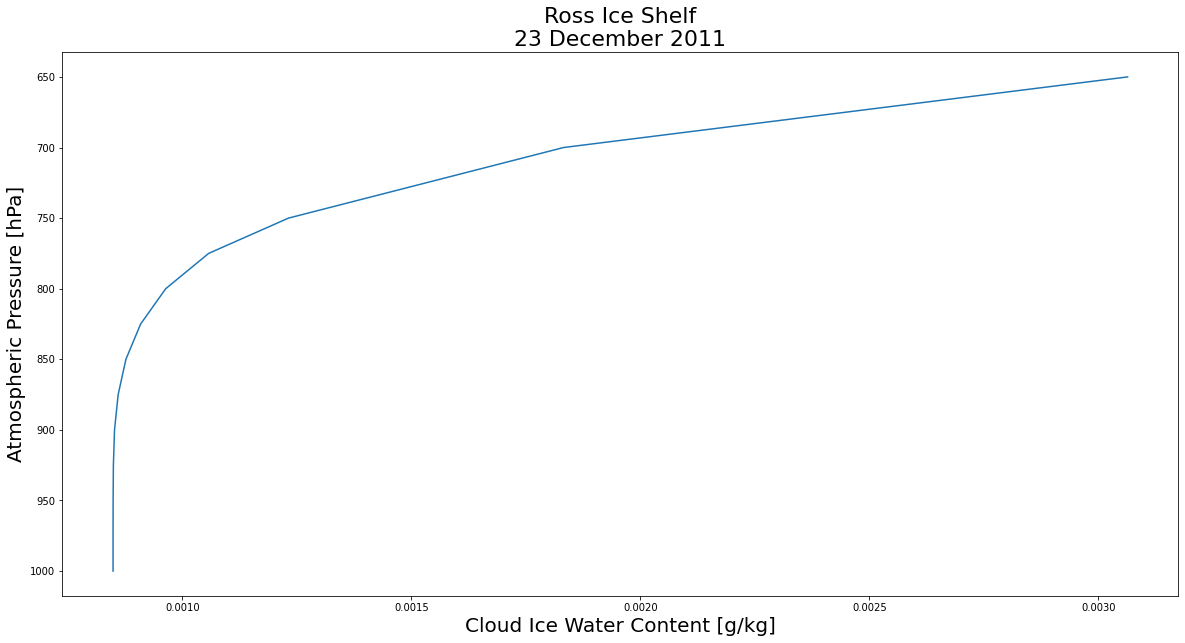

In [609]:
# plot vertical profile of ciwc for melt day in question 

plt.figure(figsize=(20,10));

plt.gca().invert_yaxis()

plt.plot(dayiw['mean'],dayiw['level']);

plt.ylabel('Atmospheric Pressure [hPa]',fontsize = 20);plt.xlabel('Cloud Ice Water Content [g/kg]',fontsize = 20);
plt.title(meltloc + '\n' + str(meltday) + ' ' + meltmonth + ' ' + meltyear, fontsize = 22)

plt.savefig(locID + str(meltday) + meltmonth + meltyear + 'ciwc' + '.pdf')

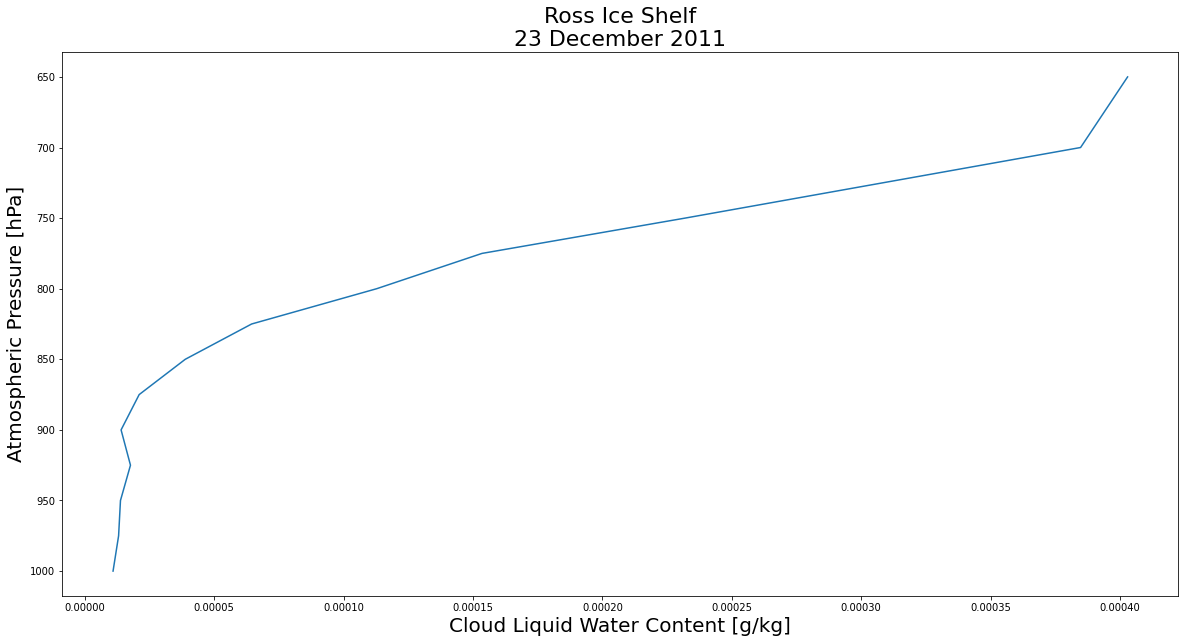

In [610]:
# plot vertical profile of clwc for melt day in question 

plt.figure(figsize=(20,10));

plt.gca().invert_yaxis()

plt.plot(daylw['mean'],daylw['level']);
plt.ylabel('Atmospheric Pressure [hPa]',fontsize = 20);plt.xlabel('Cloud Liquid Water Content [g/kg]',fontsize = 20);
plt.title(meltloc + '\n' + str(meltday) + ' ' + meltmonth + ' ' + meltyear, fontsize = 22)

plt.savefig(locID + str(meltday) + meltmonth + meltyear + 'clwc' + '.pdf')